In [2]:
# Let us import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### One of the Most Important aspect of Data Viz is we need to analyze the data and Prepare the data for the Data Visualization so that we can effectively convey the data insights

In [3]:
# Let us read the csv data using the Pandas CSV Reader
airline_df=pd.read_csv("Airfares_v1.csv")

In [4]:
# Let us analyze the schema of the airfare dataset
airline_df.dtypes

Departure_CITY               object
Arrival_CITY                 object
COUPON                      float64
VACATION                     object
Departure_avg_INCOME          int64
Arrival_avg_INCOME            int64
Departure_avg_population      int64
Arrival_avg_population        int64
SLOT                         object
GATE                         object
DISTANCE                      int64
PAX                           int64
FARE                        float64
dtype: object

In [5]:
# Let us check the shape of the dataset and identify the number of rows and columns
airline_df.shape

(638, 13)

In [6]:
# Now let us check some sample data to have an initial impression on the data..
# Departure Cities and Arrival cities are mostly US Cities
# We are having Population & Fare information available
airline_df.head()

,Departure_CITY,Arrival_CITY,COUPON,VACATION,Departure_avg_INCOME,Arrival_avg_INCOME,Departure_avg_population,Arrival_avg_population,SLOT,GATE,DISTANCE,PAX,FARE
0,Dallas/Fort Worth TX,Amarillo TX,1.00,No,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,Atlanta GA,Baltimore/Wash Intl MD,1.06,No,26993,29838,3532657,7145897,Free,Free,576,8820,174.47
2,Boston MA,Baltimore/Wash Intl MD,1.06,No,30124,29838,5787293,7145897,Free,Free,364,6452,207.76
3,Chicago IL,Baltimore/Wash Intl MD,1.06,No,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47
4,Chicago IL,Baltimore/Wash Intl MD,1.06,No,29260,29838,7830332,7145897,Free,Free,612,25144,85.47


In [7]:
# Let us now check if we have any null records in any of the rows or columns
# There is no Null or missing data in the dataset
airline_df.isnull().sum()

Departure_CITY              0
Arrival_CITY                0
COUPON                      0
VACATION                    0
Departure_avg_INCOME        0
Arrival_avg_INCOME          0
Departure_avg_population    0
Arrival_avg_population      0
SLOT                        0
GATE                        0
DISTANCE                    0
PAX                         0
FARE                        0
dtype: int64

In [8]:
#let us get the Top 10 departure cities based on the Departure Avg Population
airline_df_dep=airline_df[["Departure_CITY","Departure_avg_population"]]

In [9]:
# Let us group the data based on Departure City and get the Top 10 cities based on departure avg population
airline_df_dep1=airline_df_dep.groupby("Departure_CITY").max("Departure_avg_population").sort_values("Departure_avg_population",ascending=False).head(10)

In [10]:
# We can also use the Drop Duplicates to remove the duplicates in the data
airline_df_dep1=airline_df_dep1.drop_duplicates().reset_index()
type(airline_df_dep1)

pandas.core.frame.DataFrame

In [11]:
# This Custom method is used to control the labels in the bar plots
# Reference : https://www.statology.org/seaborn-barplot-show-values/
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [12]:
# Since the labels have empty spaces, let us trim them.
airline_df_dep1["Departure_CITY"]=airline_df_dep1["Departure_CITY"].str.replace(" ","")

### Top 10 Departure Cities Based on Avg Departure Population

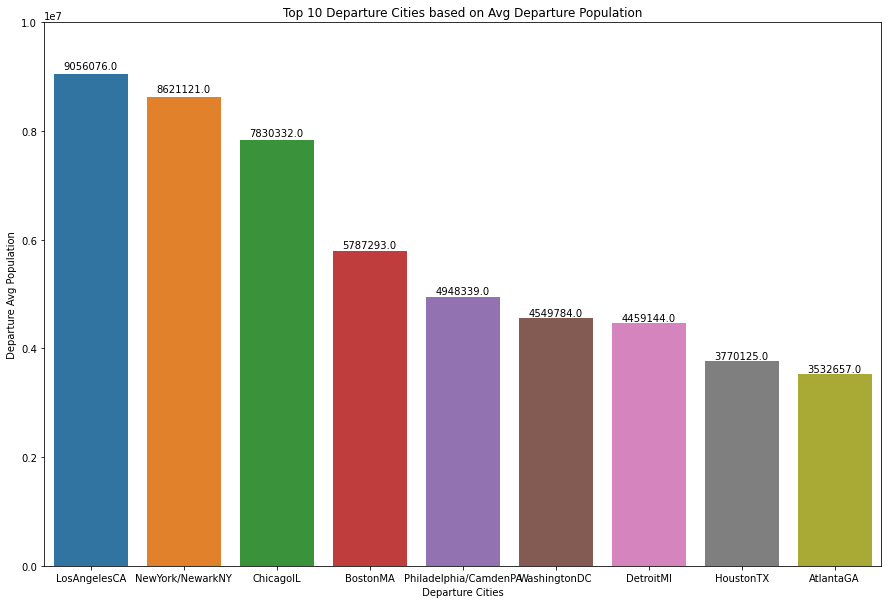

In [13]:

# Chart Values Reference https://www.statology.org/seaborn-barplot-show-values/
plt.figure(figsize=(15,10))
plt.title("Top 10 Departure Cities based on Avg Departure Population")
ax=sns.barplot(x="Departure_CITY",y="Departure_avg_population",data=airline_df_dep1,errwidth=0,estimator=min,ci=None)

# add the labels
plt.xlabel(" Departure Cities ")
plt.ylabel(" Departure Avg Population ")

ax.set_xlim(auto=False)
ax.set_ylim(0,10000000,auto=False)
show_values(ax)

In [14]:
# Now Let us analyze the Corelation between the Departure Population and the Departure Income

### Corelation between Departure Population & Departure Income

#### There is no Strong Correlation between Departure Population & Departure Income

Text(0, 0.5, ' Departure Avg Income ')

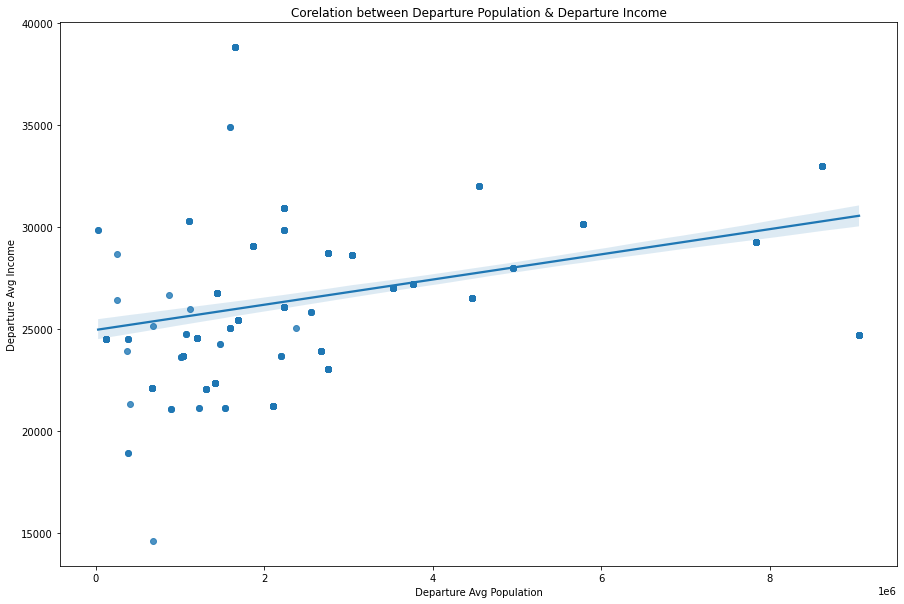

In [15]:
plt.figure(figsize=(15,10))
plt.title("Corelation between Departure Population & Departure Income")
ax=sns.regplot(x="Departure_avg_population",y="Departure_avg_INCOME",data=airline_df)

# add the labels
plt.xlabel(" Departure Avg Population ")
plt.ylabel(" Departure Avg Income ")



### Correlation between Fare and Distance

#### WE could see a Strong Correlation between Fare and Distance. As the Distance increases. Fare also linearly Increases

Text(0, 0.5, 'FARE')

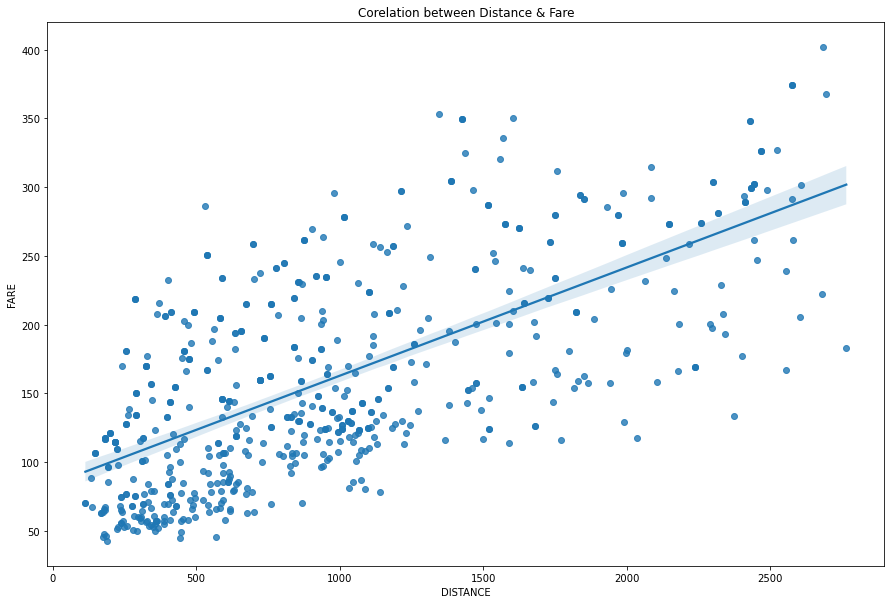

In [16]:
# We could observe that as the Distance Increases the Fare linearly increases
plt.figure(figsize=(15,10))
plt.title("Corelation between Distance & Fare")
ax=sns.regplot(x="DISTANCE",y="FARE",data=airline_df)

# add the labels
plt.xlabel("DISTANCE")
plt.ylabel("FARE")



#### Now let us create a JOINT PLOT to visualize the data with the Histogram for the Fare and Distance

Text(336.9714285714286, 0.5, 'FARE')

<Figure size 1800x720 with 0 Axes>

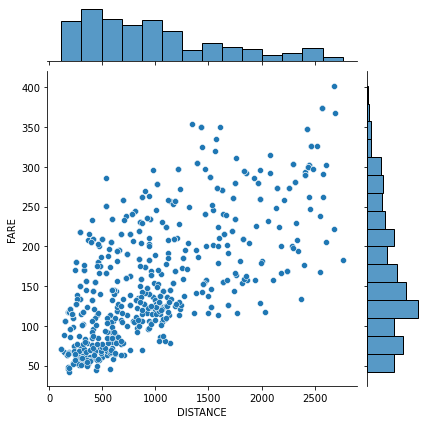

In [87]:
# We could observe that as the Distance Increases the Fare linearly increases
plt.figure(figsize=(25,10))
#plt.title("Corelation between Distance & Fare")
ax=sns.jointplot(x="DISTANCE",y="FARE",data=airline_df)

# add the labels
plt.xlabel("DISTANCE")
plt.ylabel("FARE")



In [17]:
# Let us take the Value Counts for Vacation and convert that to a Bar Plot
airline_df["VACATION"].value_counts()

No     468
Yes    170
Name: VACATION, dtype: int64

Text(0, 0.5, 'FARE')

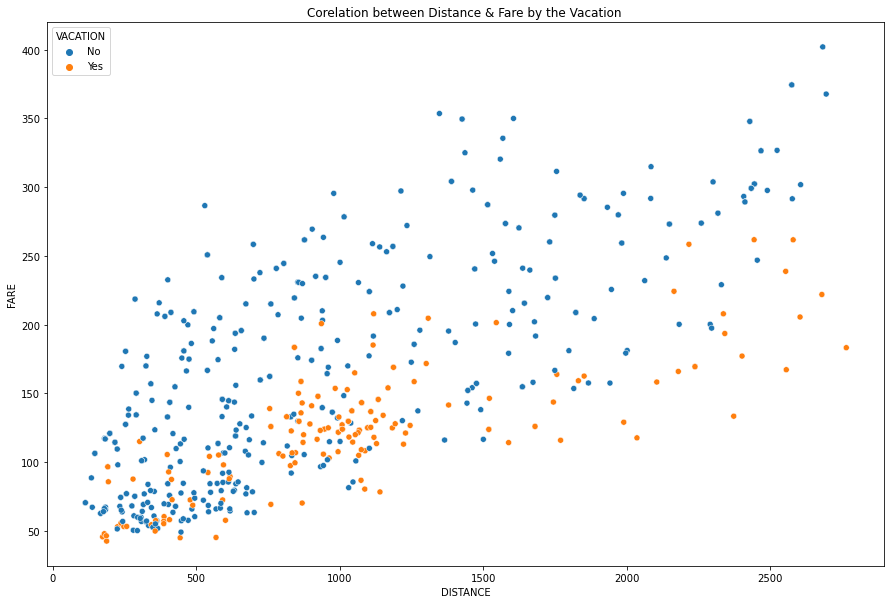

In [18]:
plt.figure(figsize=(15,10))
plt.title("Corelation between Distance & Fare by the Vacation ")
ax=sns.scatterplot(x="DISTANCE",y="FARE",hue="VACATION",data=airline_df)

# add the labels
plt.xlabel("DISTANCE")
plt.ylabel("FARE")



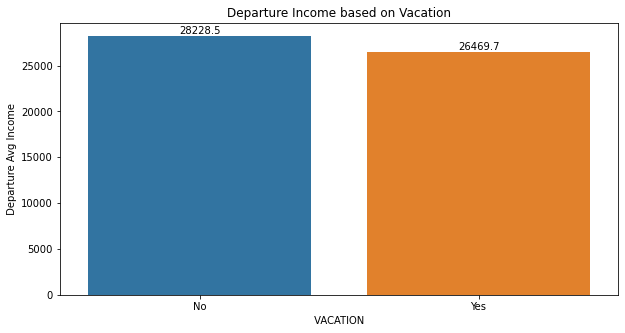

In [19]:

# Chart Values Reference https://www.statology.org/seaborn-barplot-show-values/
plt.figure(figsize=(10,5))
plt.title("Departure Income based on Vacation")
ax=sns.barplot(x="VACATION",y="Departure_avg_INCOME",data=airline_df,errwidth=0,ci=None)

# add the labels
plt.xlabel(" VACATION ")
plt.ylabel(" Departure Avg Income ")

ax.set_xlim(auto=False)
ax.set_ylim(0,None,auto=False)
show_values(ax)

#### Let us create a Pair Plot to Visualize the Different Correlations and Distributions of Data

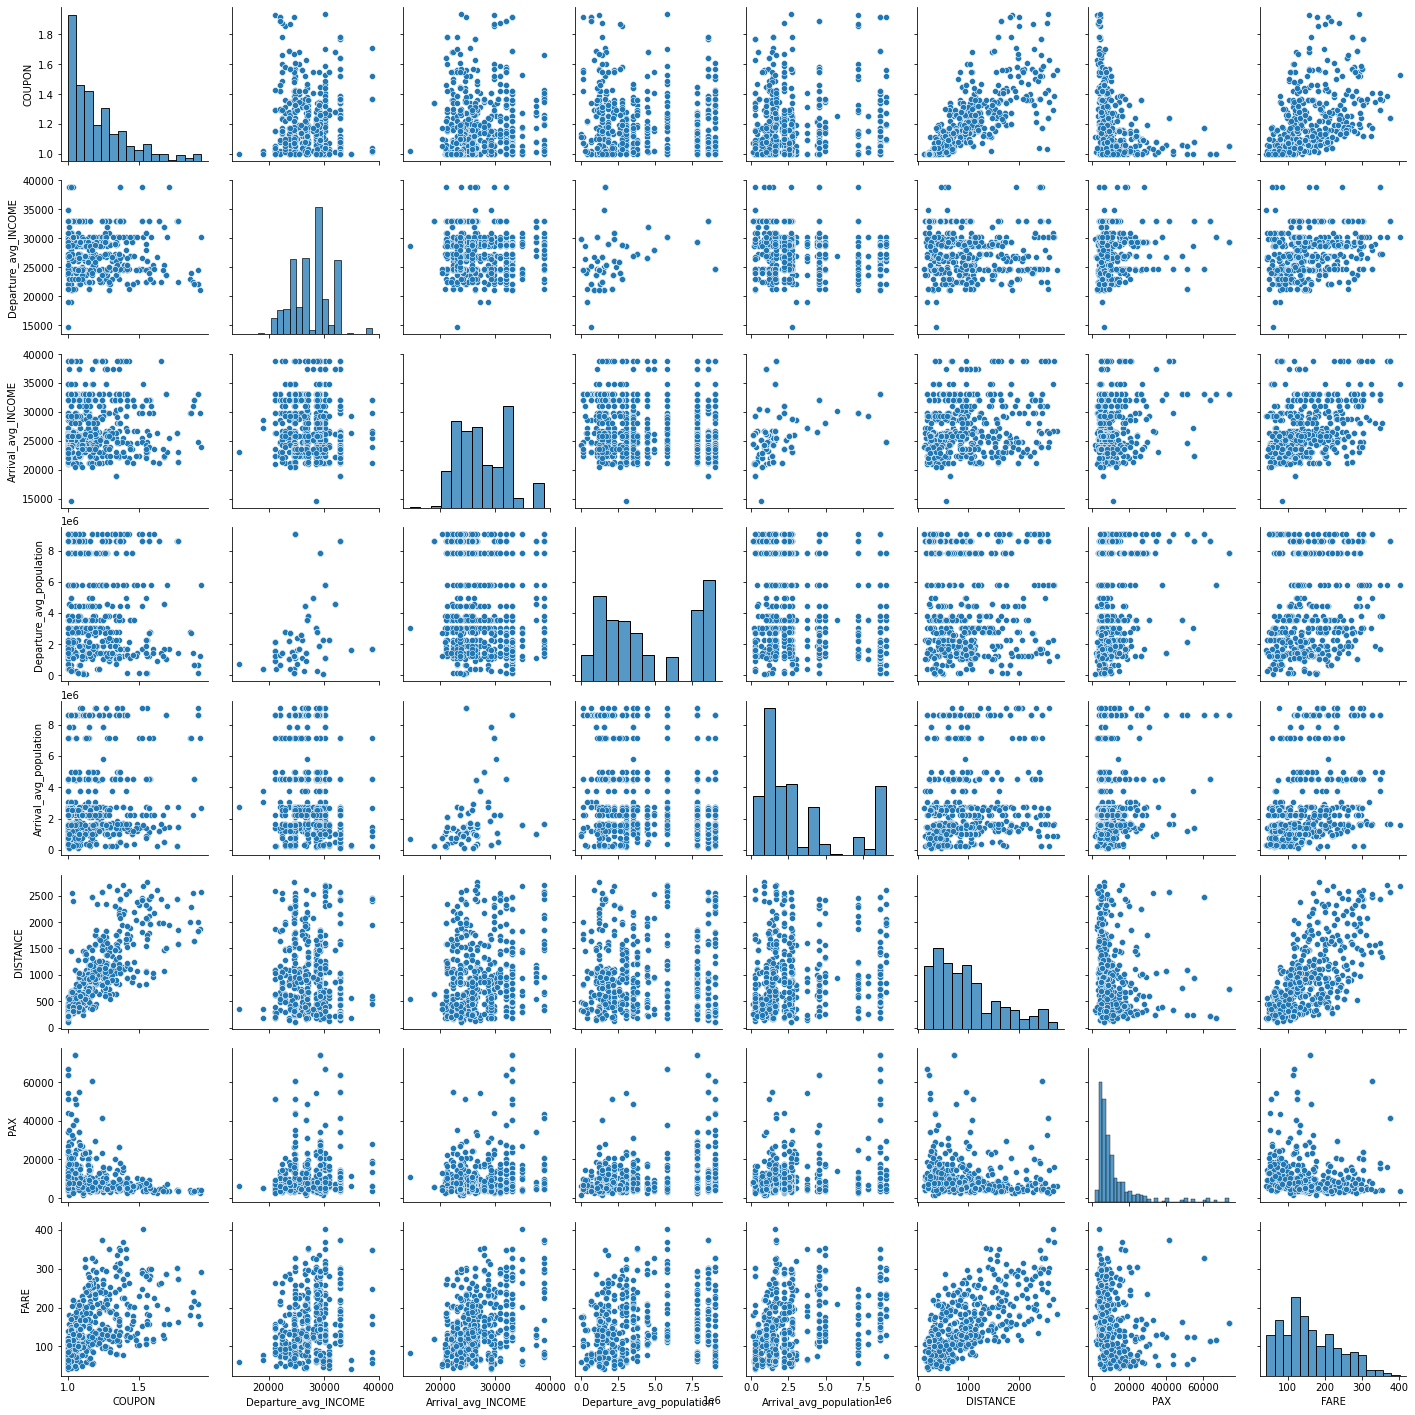

In [20]:
sns.pairplot(data=airline_df)

### Let us analyze the Distribution of Fare in our Data 

(24.4925, 419.9975)

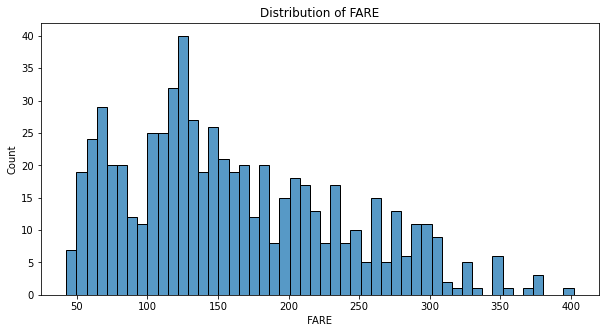

In [21]:
#The Fare Plot reveals that there is a Right Skew
# Chart Values Reference https://www.statology.org/seaborn-barplot-show-values/
plt.figure(figsize=(10,5))
plt.title("Distribution of FARE")
ax=sns.histplot(airline_df.FARE,bins=50,kde=False)

# add the labels
plt.xlabel(" FARE ")


ax.set_xlim(auto=False)


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FARE', ylabel='Density'>

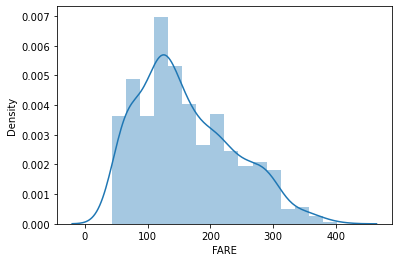

In [95]:
sns.distplot(airline_df.FARE)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival_avg_INCOME', ylabel='Density'>

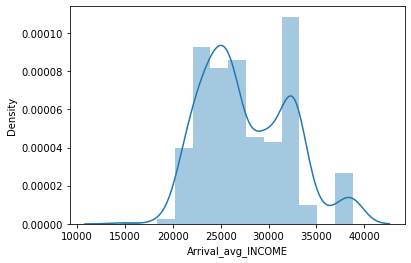

In [96]:
sns.distplot(airline_df.Arrival_avg_INCOME)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PAX', ylabel='Density'>

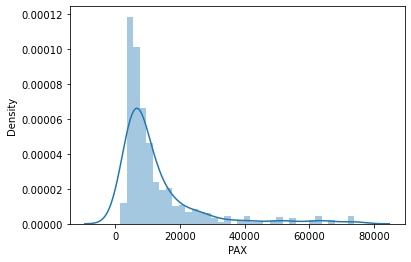

In [97]:
sns.distplot(airline_df.PAX)

In [24]:
airline_df.describe()

,COUPON,Departure_avg_INCOME,Arrival_avg_INCOME,Departure_avg_population,Arrival_avg_population,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


In [25]:
airline_df.SLOT.value_counts()

Free          456
Controlled    182
Name: SLOT, dtype: int64

In [26]:
airline_df.GATE.value_counts()

Free           514
Constrained    124
Name: GATE, dtype: int64

In [33]:
airline_df.COUPON.value_counts()

1.00    65
1.01    38
1.02    35
1.06    25
1.05    20
        ..
1.38     1
1.87     1
1.71     1
1.93     1
1.32     1
Name: COUPON, Length: 77, dtype: int64

In [ ]:
#let us get the Top 10 arrival cities based on the Departure Avg Population
airline_df_dep=airline_df[["Departure_CITY","Departure_avg_population"]]

#### Pie Chart on the Average Income based on Vacation Type

In [40]:
# Let us prepare the Data for the Pie Chart
airline_pie=airline_df[["VACATION","Departure_avg_INCOME"]]

In [57]:
# Let us group the data based on Departure City and get the Top 10 cities based on departure avg population
airline_pie_1=airline_pie.groupby("VACATION").mean("Departure_avg_INCOME").sort_values("Departure_avg_INCOME",ascending=False).head(10).reset_index()

#### WE could see that 52% of the Departure Avg Income is from the Vacation Type "NO", let us plot in Pie Chart 


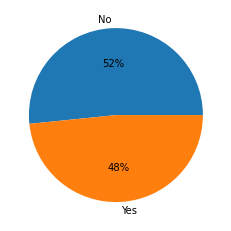

In [58]:
#define Seaborn color palette to use
#colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(airline_pie_1.Departure_avg_INCOME, labels =airline_pie_1.VACATION, autopct='%.0f%%')
plt.show()

In [59]:
airline_pie_1

,VACATION,Departure_avg_INCOME
0,No,28228.510684
1,Yes,26469.694118


In [61]:
airline_df.Arrival_CITY.value_counts()

New York/Newark     NY    75
Washington          DC    54
Phoenix             AZ    25
Baltimore/Wash Intl MD    23
Orlando             FL    23
                          ..
Boston              MA     1
Memphis             TN     1
El Paso             TX     1
Cincinnati          OH     1
Amarillo            TX     1
Name: Arrival_CITY, Length: 68, dtype: int64

### HeatMap to analyze the Departure Avg Income between Departure and Arrival Cities

In [68]:
# Let us Prepare the Data First
heat_df1=airline_df[["Departure_CITY","Arrival_CITY","Departure_avg_INCOME"]].drop_duplicates().reset_index()

In [70]:
heat_df2=heat_df1.pivot("Departure_CITY","Arrival_CITY","Departure_avg_INCOME")

<AxesSubplot:xlabel='Arrival_CITY', ylabel='Departure_CITY'>

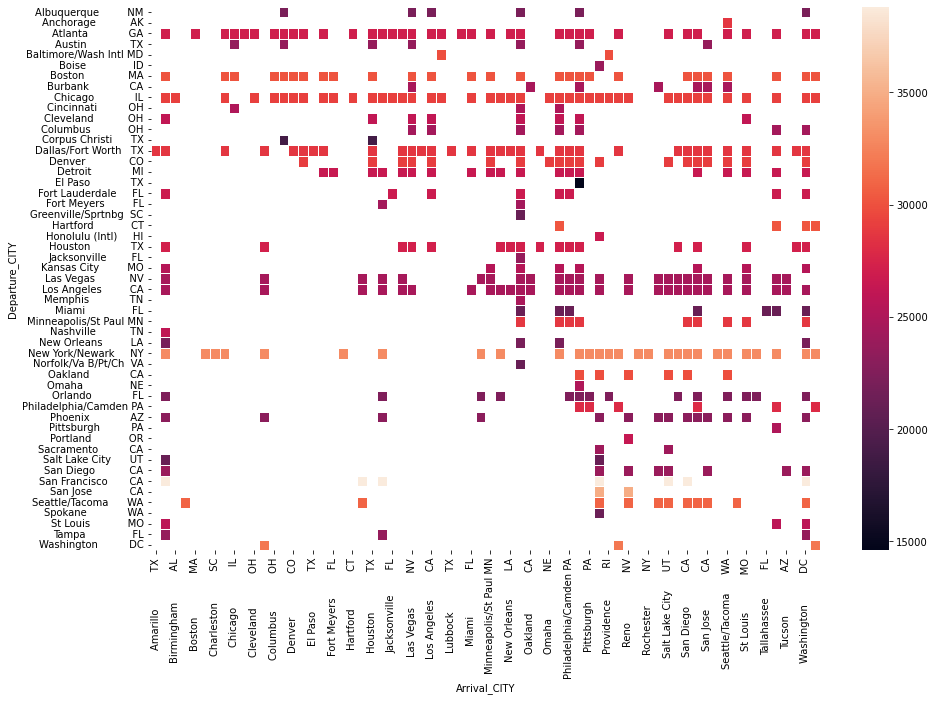

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(heat_df2,fmt="e", linewidths=.5)

### HeatMap to analyze the Arrival Avg Income between Departure and Arrival Cities

In [80]:
# Let us Prepare the Data First
heat_df3=airline_df[["Departure_CITY","Arrival_CITY","Arrival_avg_INCOME"]].drop_duplicates().reset_index()

In [81]:
heat_df4=heat_df3.pivot("Departure_CITY","Arrival_CITY","Arrival_avg_INCOME")

<AxesSubplot:xlabel='Arrival_CITY', ylabel='Departure_CITY'>

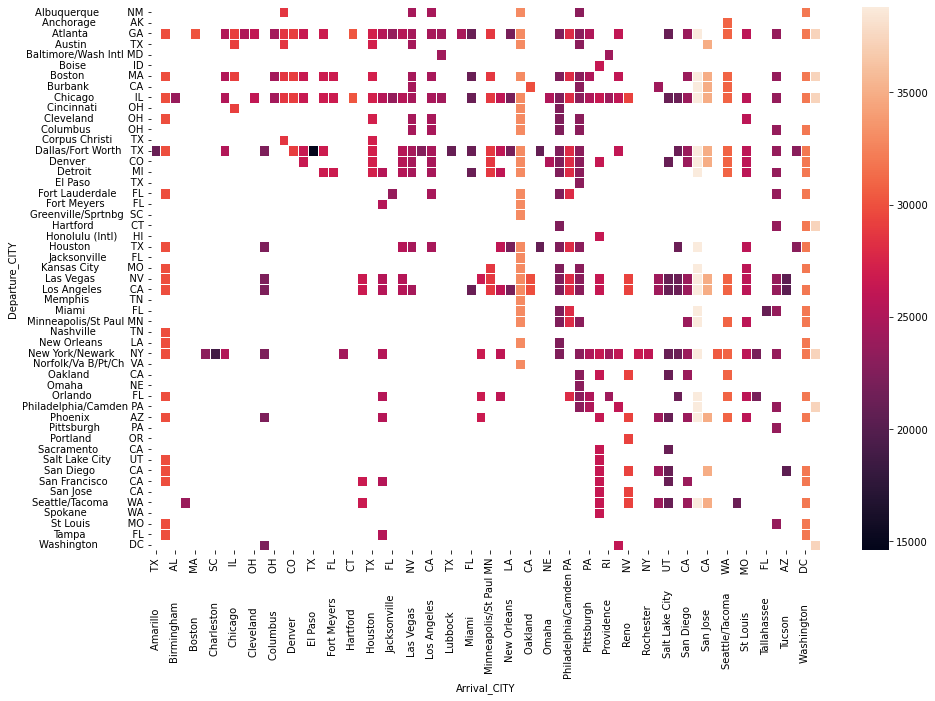

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(heat_df4,fmt="e", linewidths=.5)

### Now Let us Visualize the Correlation between the different Variables

In [89]:
corr=airline_df.corr()

In [90]:
corr

,COUPON,Departure_avg_INCOME,Arrival_avg_INCOME,Departure_avg_population,Arrival_avg_population,DISTANCE,PAX,FARE
COUPON,1.000000,-0.088403,0.046889,-0.107763,0.094970,0.746805,-0.336974,0.496537
Departure_avg_INCOME,-0.088403,1.000000,-0.138864,0.517187,-0.272280,0.028153,0.138197,0.209135
Arrival_avg_INCOME,0.046889,-0.138864,1.000000,-0.144059,0.458418,0.176531,0.259961,0.326092
Departure_avg_population,-0.107763,0.517187,-0.144059,1.000000,-0.280143,0.018437,0.284611,0.145097
Arrival_avg_population,0.094970,-0.272280,0.458418,-0.280143,1.000000,0.115640,0.314698,0.285043
DISTANCE,0.746805,0.028153,0.176531,0.018437,0.115640,1.000000,-0.102482,0.670016
PAX,-0.336974,0.138197,0.259961,0.284611,0.314698,-0.102482,1.000000,-0.090705
FARE,0.496537,0.209135,0.326092,0.145097,0.285043,0.670016,-0.090705,1.000000


#### We could observe a Strong Correlation between Coupon <> Distance, Coupon <> Fare,  Fare <> Distance etc

<AxesSubplot:>

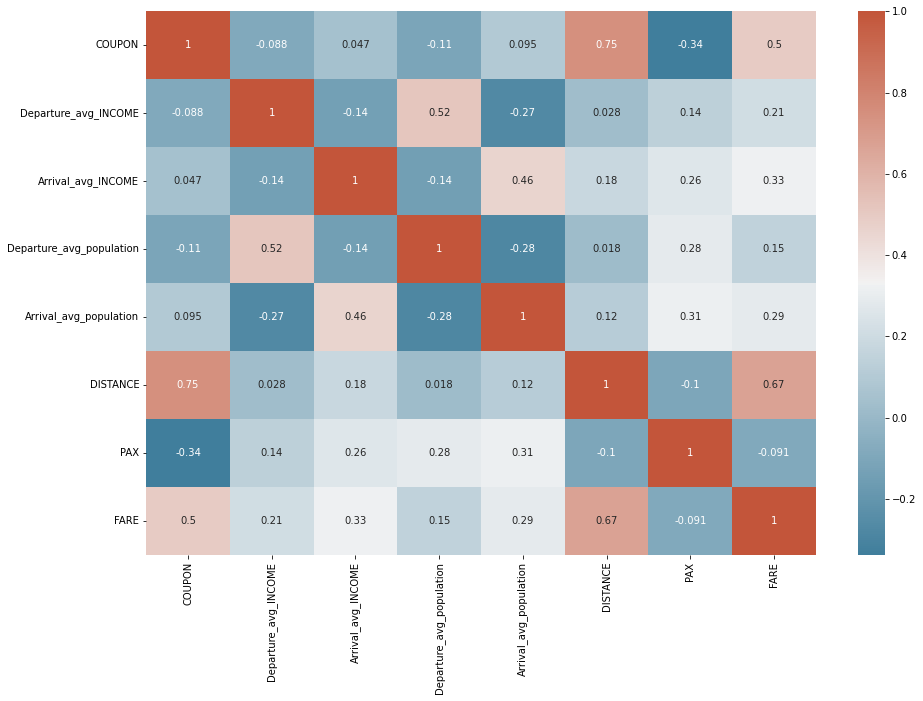

In [94]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True,cmap=cmap)